In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load the data
df_auc = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Program/2025_rmenasria_prematurity/notebooks/racim/prematurity_AUC_by_region_thresholded_0708_dHCP.csv")  
df_auc = df_auc[df_auc['AUC_28_32'] != 0] 
df_region = pd.read_csv("/neurospin/dico/rmenasria/Runs/03_main/Output/csv/all_regions_gravity_center_shifts_utrecht_dHCP.csv")  


In [31]:
region_list=df_region["region"].values
print("Region list",region_list)
print("Number of regions", len(region_list))

regions_list=df_auc["region"].values 
regions_list=[ x for x in regions_list if x.endswith("right")]
print("Regions list", regions_list)
print("Number of regions", len(regions_list))

Region list ['F.C.M.post.-S.p.C._left' 'S.C.-sylv._left' 'S.T.s.br._left'
 'S.F.int.-F.C.M.ant._left' 'S.Or.-S.Olf._right' 'F.I.P._left'
 'S.C.-S.Pe.C._left' 'F.Coll.-S.Rh._right' 'F.C.M.post.-S.p.C._right'
 'deMatos._right' 'fronto-parietal_medial_face._right'
 'S.F.int.-S.R._right' 'F.C.L.p.-S.GSM._left' 'CINGULATE._right'
 'F.I.P.-F.I.P.Po.C.inf._left' 'S.T.s._right' 'F.C.L.p.-S.GSM._right'
 'Sc.Cal.-S.Li._left' 'OCCIPITAL_left' 'S.Po.C._right'
 'S.F.inter.-S.F.sup._left' 'S.s.P.-S.Pa.int._right'
 'S.s.P.-S.Pa.int._left' 'F.I.P._right' 'S.Or._right'
 'S.F.inf.-BROCA-S.Pe.C.inf._left' 'S.Po.C._left'
 'F.I.P.-F.I.P.Po.C.inf._right' 'S.F.median-S.F.pol.tr.-S.F.sup._left'
 'S.C.-S.Po.C._right' 'Sc.Cal.-S.Li._right' 'S.T.s._left'
 'LARGE_CINGULATE._right' 'S.T.s.br._right' 'S.Pe.C._left'
 'S.T.i.-S.O.T.lat._left' 'Lobule_parietal_sup._left'
 'F.C.L.p.-subsc.-F.C.L.a.-INSULA._right'
 'S.F.median-S.F.pol.tr.-S.F.sup._right' 'S.T.s.-S.GSM._right'
 'S.Or._left' 'F.C.L.p.-subsc.-F.C.L.a.-INSU

In [32]:
df_region["region_clean"] = df_region["region"].str.replace(r"\.", "", regex=True)
df_auc["region_clean"] = df_auc["region"].str.replace(r"\.", "", regex=True)
df_auc_left = df_auc[df_auc["region_clean"].str.endswith("_right")].copy()


Nombre de régions pour lesquelles l'AUC n'a pas été trouvée : 46


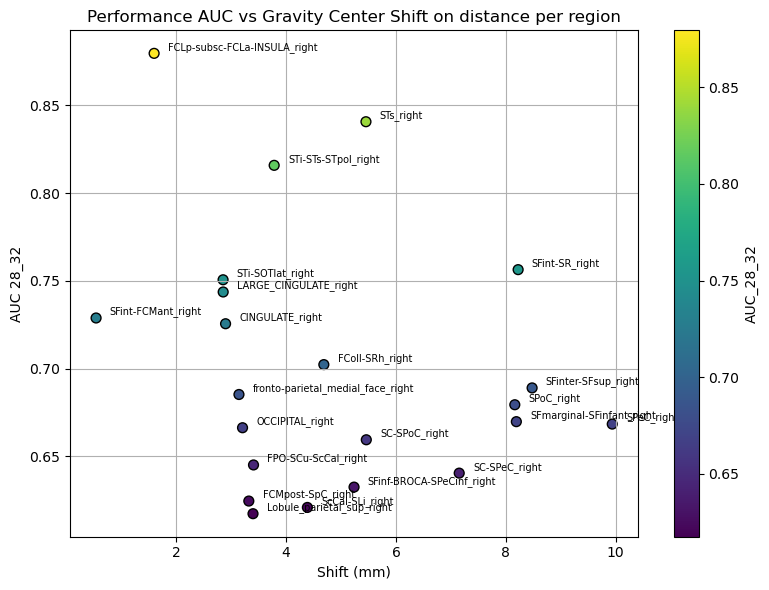

In [37]:
df_plot = df_region.merge(
    df_auc_left[["region_clean", "AUC_28_32"]],
    on="region_clean",
    how="left"
)

# À ce stade, regardons combien de lignes n'ont pas trouvé de correspondance :
missing_mask = df_plot["AUC_28_32"].isna()
print("\nNombre de régions pour lesquelles l'AUC n'a pas été trouvée :", missing_mask.sum())


# Tracer le scatter plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    df_plot['distance'], 
    df_plot['AUC_28_32'], 
    c=df_plot['AUC_28_32'], 
    cmap='viridis', 
    s=50, 
    edgecolor='k'
)
plt.colorbar(sc, label='AUC_28_32')


for _, row in df_plot.iterrows():
    plt.text(
        row['distance'] + 0.25,
        row['AUC_28_32'] + 0.002,
        row['region_clean'],
        fontsize=7)
    

plt.xlabel("Shift (mm)")
plt.ylabel("AUC 28_32")
plt.title("Performance AUC vs Gravity Center Shift on distance per region")
plt.grid(True)
plt.tight_layout()
plt.show()